In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as gaussian

In [2]:
df = pd.read_csv("data_generative/binclass.txt", names = ['Input dimension 1', 'Input dimension 2', 'y'])

In [3]:
df.head()

,Input dimension 1,Input dimension 2,y
0,4.5316,13.5610,1
1,8.1112,13.9300,1
2,15.5630,4.8348,1
3,14.7630,20.5850,1
4,14.3260,25.6140,1


In [4]:
df.tail()

,Input dimension 1,Input dimension 2,y
395,21.634,6.6954,-1
396,17.663,12.9390,-1
397,16.566,1.6164,-1
398,13.930,9.1910,-1
399,21.882,9.3220,-1


In [5]:
df.isnull().sum()

Input dimension 1    0
Input dimension 2    0
y                    0
dtype: int64

Suppose the given data is $\{(x_n, y_n)\}_{n=1}^N$ where $x_n \in \mathbb{R}^{D\times 1}$ and $y_n\in\{\pm 1\}$

We observe that $N = 400$ and $D = 2$

Let $X = [x_1^T \; x_2^T \;\ldots\; x_N^T] \in \mathbb{R}^{N\times D}$ and $y = [y_1 \; y_2\; \ldots \; y_N]^T\in \mathbb{R}^{N\times 1}$

We set the matrices $X$ and $y$ as follows

In [6]:
data = df.values
X = data[:, :-1]
y = data[:, -1]
N = 400
D = 2

Now, we separate the positive and negative examples

In [7]:
# Postive exampless
X_pos = X[y > 0]

# Negative examples
X_neg = X[y < 0]



For $\cal{N}(\mu_j, \sigma_j^2 I_2)$, the MLE solution for $\mu_j$ where $j\in\{\pm1\}$ is given by:

$$\hat{\mu}_j = \frac{1}{N_j} \sum\limits_{y_i = j}^{N} x_i \;\;\ \in\mathbb{R}^{D\times 1}$$

where $N_j$ denotes the number of examples coming from class $j$


In [8]:
temp = 0;
for x in X_pos:
    temp += x
    
# Optimal mean for positive (+1) class using MLE 
mu_pos_hat = temp / X_pos.shape[0]

mu_temp = 0;
for x in X_neg:
    temp += x

# Optimal mean for negative (-1) class using MLE
mu_neg_hat = np.mean(X_neg, axis = 0)

print("Optimal mean for positive (+1) class using MLE: {}".format(mu_pos_hat))
print("Optimal mean for negative (-1) class using MLE: {}".format(mu_neg_hat))

Optimal mean for positive (+1) class using MLE: [10.01145764 19.5495245 ]
Optimal mean for negative (-1) class using MLE: [20.32489     9.68799575]


For $\cal{N}(\mu_j, \sigma_j^2 I_2)$, the MLE solution for $\sigma_j^2$ where $j\in\{\pm1\}$ is given by:

$$\hat{\sigma}^2_j = \frac{1}{N_j\times D} \sum\limits_{y_i = j}^{N} (x_i - \mu_j)^T (x_i - \mu) \;\;\ \in\mathbb{R}$$

where $N_j$ denotes the number of examples coming from class $j$

In [9]:
temp = 0
for x in X_pos:
    temp += np.dot(x - mu_pos_hat.ravel(), x - mu_pos_hat.ravel())
    
# Optimal sigma_square for positive (+1) class using MLE 
sigmaSq_pos_hat = temp / (X_pos.shape[0] * D)

temp = 0
for x in X_neg:
    temp += np.dot(x - mu_neg_hat.ravel(), x - mu_neg_hat.ravel())
    
# Optimal sigma_square for negative (-1) class using MLE 
sigmaSq_neg_hat = temp / (X_neg.shape[0] * D)

print("Optimal sigma_square for positive (+1) class using MLE: {}".format(sigmaSq_pos_hat))
print("Optimal sigma_square for negative (-1) class using MLE: {}".format(sigmaSq_neg_hat))

Optimal sigma_square for positive (+1) class using MLE: 26.60589653084014
Optimal sigma_square for negative (-1) class using MLE: 9.500608154947217


Now, we will plot the given data points and the decision boundary for the case of difference covariance

The learned decision boundary in this case will be given by

$$\cal{N}( x \; |\;\hat{\mu}_{+}, \hat{\sigma}_{+}^2 I_2) - \cal{N}( x \; |\;\hat{\mu}_{-}, \hat{\sigma}_{+}^2 I_2) = 0$$

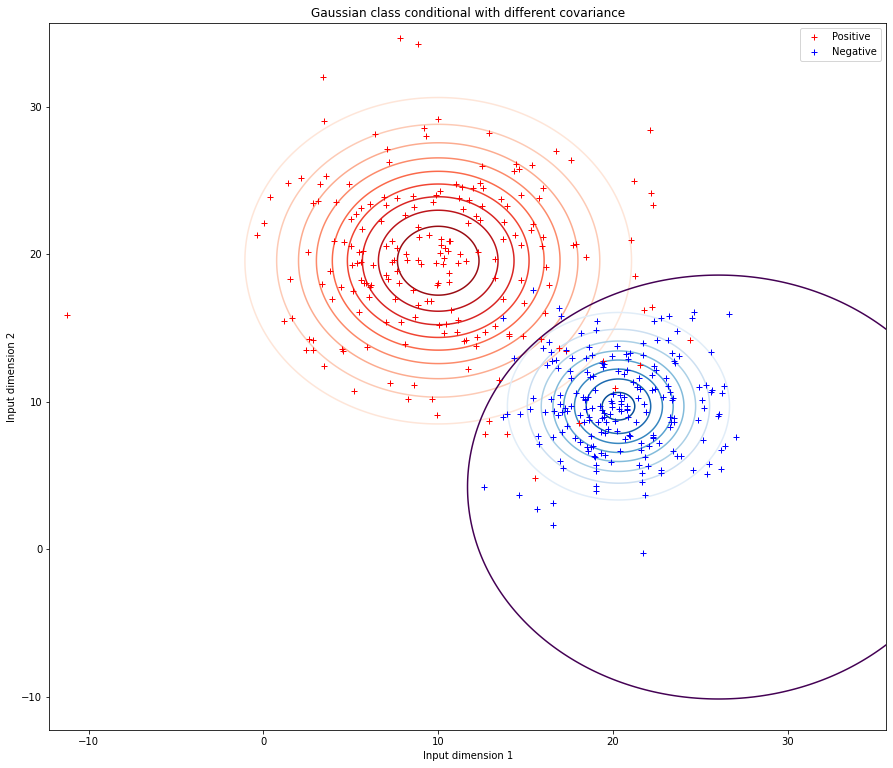

In [10]:
# Initialize the plot
plt.figure(figsize = (15,13))
plt.title('Gaussian class conditional with different covariance')
plt.xlabel('Input dimension 1')
plt.ylabel('Input dimension 2')

# Set equispaced points
u = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 1])+1, 1000);
v = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 1])+1, 1000)[:, None]

# Set the domain
U, V = np.meshgrid(u,v)
domain = np.empty(U.shape + (2,))
domain[:, :, 0] = U
domain[:, :, 1] = V

# Positive class 
plt.plot(X_pos[:, 0], X_pos[:, 1], 'r+', label = 'Positive')
plt.contour(U, V, gaussian(mu_pos_hat.ravel(), sigmaSq_pos_hat * np.eye(2)).pdf(domain), 10, cmap = plt.cm.Reds)

# Negative class
plt.plot(X_neg[:, 0], X_neg[:, 1], 'b+', label = 'Negative')
plt.contour(U, V, gaussian(mu_neg_hat.ravel(), sigmaSq_neg_hat * np.eye(2)).pdf(domain), 10, cmap = plt.cm.Blues)

# Decision boundary
plt.contour(U, V, gaussian(mu_pos_hat.ravel(), sigmaSq_pos_hat * np.eye(2)).pdf(domain) - \
            gaussian(mu_neg_hat.ravel(), sigmaSq_neg_hat * np.eye(2)).pdf(domain), [0])

plt.legend()
plt.savefig('binclass Gaussian class conditional with different covariance.png')
plt.show()


For $\cal{N}(\mu_j, \sigma^2 I_2)$, the MLE solutions for $\mu_j$ where $j\in\{\pm 1\}$ will remain same however the solution for $\sigma^2$ will be given by

$$\hat{\sigma}^2 = \frac{1}{N\times D}  \sum\limits_{i = 1}^N (x_i - \mu_{y_i})$$

In [11]:
temp = 0
for x in X_pos:
    temp += np.dot(x - mu_pos_hat.ravel(), x - mu_pos_hat.ravel())
for x in X_neg:
    temp += np.dot(x - mu_neg_hat.ravel(), x - mu_neg_hat.ravel())

# Optimal sigma_square for both classes
sigmaSq_hat = temp / (N * D)

print("Optimal sigma_square for both classes: {}".format(sigmaSq_hat))

Optimal sigma_square for both classes: 18.053252342893675


Now we will plot the data points and decision boundary for the case with same covariance

The learned decision boundary in this case will be given by

$$\cal{N}( x \; |\;\hat{\mu}_{+}, \hat{\sigma}^2 I_2) - \cal{N}( x \; |\;\hat{\mu}_{-}, \hat{\sigma}^2 I_2) = 0$$

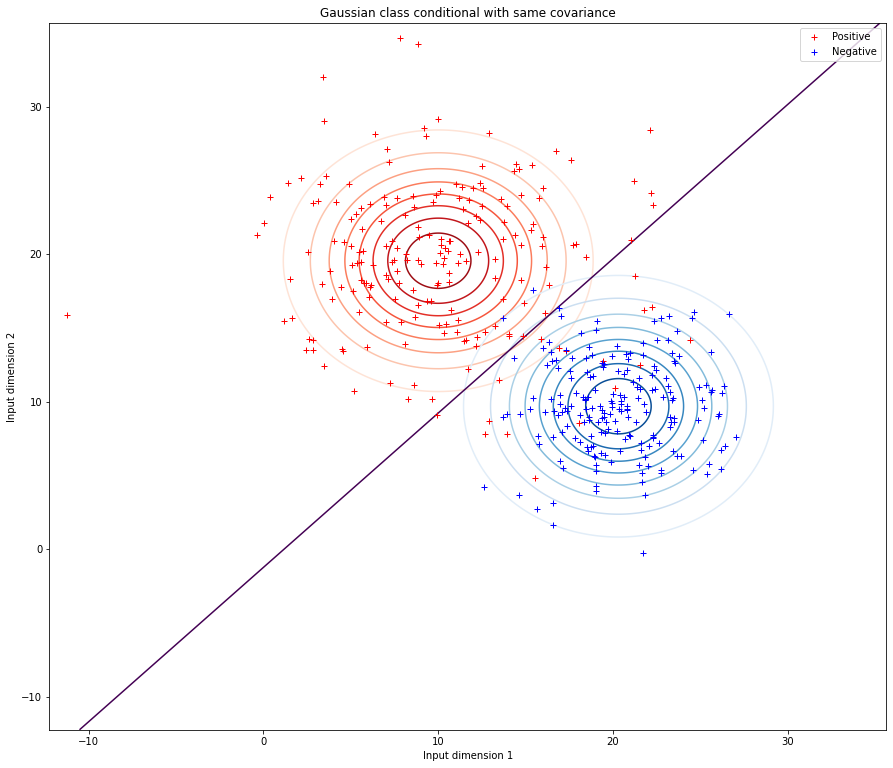

In [12]:
# Initialize the plot
plt.figure(figsize = (15,13))
plt.title('Gaussian class conditional with same covariance')
plt.xlabel('Input dimension 1')
plt.ylabel('Input dimension 2')

# Set equispaced points
u = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 1])+1, 1000);
v = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 1])+1, 1000)[:, None]

# Set the domain
U, V = np.meshgrid(u,v)
domain = np.empty(U.shape + (2,))
domain[:, :, 0] = U
domain[:, :, 1] = V

# Positive class 
plt.plot(X_pos[:, 0], X_pos[:, 1], 'r+', label = 'Positive')
plt.contour(U, V, gaussian(mu_pos_hat.ravel(), sigmaSq_hat * np.eye(2)).pdf(domain), 10, cmap = plt.cm.Reds)

# Negative class
plt.plot(X_neg[:, 0], X_neg[:, 1], 'b+', label = 'Negative')
plt.contour(U, V, gaussian(mu_neg_hat.ravel(), sigmaSq_hat * np.eye(2)).pdf(domain), 10, cmap = plt.cm.Blues)

# Decision boundary
plt.contour(U, V, gaussian(mu_pos_hat.ravel(), sigmaSq_hat * np.eye(2)).pdf(domain) - \
            gaussian(mu_neg_hat.ravel(), sigmaSq_hat * np.eye(2)).pdf(domain), [0])

plt.legend()
plt.savefig('binclass Gaussian class conditional with same covariance.png')
plt.show()